In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

path = './csv/CK/'

In [2]:
versions = ["3-4","3-5","3-6","3-7","3-8","4-0","4-1","4-2","4-3","5-0"]
modules = ["architecture","cli","gui","logic","migrations","model","pdfimport","preferences","styletester","shared","collab","event","external","bst","exporter","importer","specialfields","sql","util"]
metrics = ["CBO","DIT","LCOM","NOC","RFC","WMC"]

collection = {}

for v in versions:
    data = pd.read_csv(path + v + "CK.csv", skiprows=1)
#     print("Version " + v + " :")
    for mod in modules:
        rows = data[data["Class"].str.contains("jabref." + mod)]
        if(not(rows.empty)):
#             print("Module " + mod + " : ")
#             display(rows.describe())
            collection[mod + v] = rows.describe()
            collection[mod + v]["Module"] = mod
            collection[mod + v]["Version"] = v
    
collection["gui5-0"]

,CBO,DIT,LCOM,NOC,RFC,WMC,Module,Version
count,555.000000,529.00000,555.000000,529.000000,574.000000,555.000000,gui,5-0
mean,10.747748,0.52552,1.852252,0.432892,14.674216,10.077477,gui,5-0
std,11.715081,0.72549,1.815440,3.495632,17.905418,13.785991,gui,5-0
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,gui,5-0
25%,4.000000,0.00000,1.000000,0.000000,5.000000,3.000000,gui,5-0
50%,8.000000,0.00000,1.000000,0.000000,9.000000,6.000000,gui,5-0
75%,13.500000,1.00000,2.000000,0.000000,18.000000,12.500000,gui,5-0
max,136.000000,4.00000,18.000000,54.000000,192.000000,169.000000,gui,5-0


In [3]:
data = pd.concat(collection)
# data.set_index("Module", append=True, inplace=True)
# data.set_index("Version", append=True, inplace=True)

data.reset_index(level=0,drop=True,inplace=True)

# data.index.set_names(["Measure","Module","Version"],inplace=True)
# data = data.reorder_levels(["Module","Version","Measure"])
data.index.set_names(["Measure"],inplace=True)
data

,CBO,DIT,LCOM,NOC,RFC,WMC,Module,Version
Measure,,,,,,,,
count,4.000000,3.0,4.000000,3.0,4.000000,4.000000,cli,3-4
mean,13.500000,0.0,1.750000,0.0,43.000000,28.250000,cli,3-4
std,17.710637,0.0,1.707825,0.0,50.219518,35.752622,cli,3-4
min,3.000000,0.0,0.000000,0.0,0.000000,0.000000,cli,3-4
25%,4.500000,0.0,0.750000,0.0,5.250000,2.250000,cli,3-4
...,...,...,...,...,...,...,...,...
min,1.000000,0.0,2.000000,0.0,3.000000,3.000000,styletester,5-0
25%,2.500000,0.0,2.000000,0.0,5.000000,3.000000,styletester,5-0
50%,4.000000,0.0,2.000000,0.0,7.000000,3.000000,styletester,5-0


In [4]:
data.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'count',
       'mean',
       ...
       '75%', 'max', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max'],
      dtype='object', name='Measure', length=824)

[Text(0, 0, '3-4'),
 Text(0, 0, '3-5'),
 Text(0, 0, '3-6'),
 Text(0, 0, '3-7'),
 Text(0, 0, '3-8'),
 Text(0, 0, '4-0'),
 Text(0, 0, '4-1'),
 Text(0, 0, '4-2'),
 Text(0, 0, '4-3'),
 Text(0, 0, '5-0')]

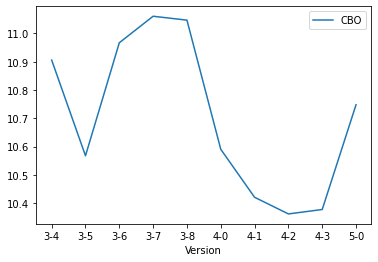

In [5]:
gui = data[data["Module"] == "gui"].loc["mean"]
# display(gui)
ax = gui.plot(x="Version",y="CBO",kind="line")
ax.set_xticks(range(len(gui.index)))
ax.set_xticklabels(gui["Version"])


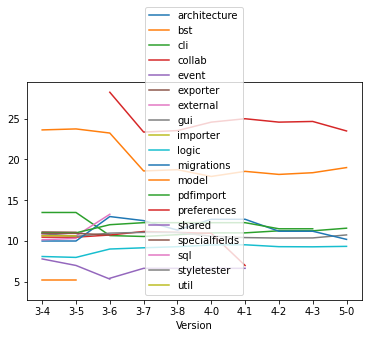

In [6]:
test = data.loc["mean"].pivot(index="Version",columns="Module",values="CBO")
graph = test.plot()
graph.set_xticks(range(len(gui.index)))
graph.set_xticklabels(gui["Version"])
graph.legend()

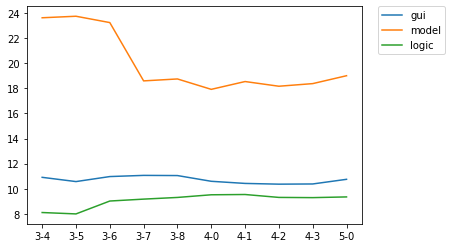

In [7]:
test = data.loc["mean"].pivot(index="Version",columns="Module",values="CBO")
test.head()
modules = ["gui","model","logic"]
for mod in modules:
    plt.plot(versions,test[mod],label=mod)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [8]:
# data : dataframe containing all data
# metric : one of the following -> CBO DIT LCOM NOC RFC WMC
# measure : one of the following -> count mean std min 25% 50% 75% max
    # (count is the number of classes, and 50% the median)
# modules : list of the modules to plot, among the following ->
    # "architecture","cli","gui","logic","migrations","model","pdfimport",
    # "preferences","styletester","shared","collab","event","external","bst",
    # "exporter","importer","specialfields","sql","util"

def versionEvol(data,metric,measure,mods):
    d = data.loc[measure].pivot(index="Version",columns="Module",values=metric)
    for mod in modules:
        plt.plot(versions,test[mod],label=mod)
    plt.title("Modules " + measure + " " + metric + " evolution")
    plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
    return

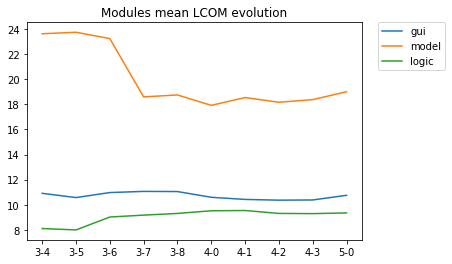

In [9]:
# Use example
versionEvol(data,"LCOM","mean",["gui","model","logic"])

In [10]:
def tab_for(data,metric,measure,mods):
    d = data.loc[measure]
    d = d[d["Module"].isin(mods)]
    col_list = modules.append(metric)
    d = d[[metric,"Module","Version"]]
    display(d)
    return

tab_for(data,"NOC","mean",["gui","logic","model"])

,NOC,Module,Version
Measure,,,
mean,0.257812,gui,3-4
mean,0.154150,logic,3-4
mean,1.774194,model,3-4
mean,0.247500,gui,3-5
mean,0.154440,logic,3-5
mean,1.718750,model,3-5
mean,0.252083,gui,3-6
mean,0.180791,logic,3-6
mean,1.386364,model,3-6


In [11]:
data[data["Module"].isin(["gui","model","logic"])]

,CBO,DIT,LCOM,NOC,RFC,WMC,Module,Version
Measure,,,,,,,,
count,393.000000,384.000000,393.000000,384.000000,401.000000,393.000000,gui,3-4
mean,10.905852,0.192708,1.753181,0.257812,15.581047,12.017812,gui,3-4
std,19.700533,0.438784,1.834379,2.177188,25.443841,22.287481,gui,3-4
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,gui,3-4
25%,4.000000,0.000000,1.000000,0.000000,5.000000,3.000000,gui,3-4
...,...,...,...,...,...,...,...,...
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,model,5-0
25%,5.000000,0.000000,1.000000,0.000000,3.000000,3.000000,model,5-0
50%,9.000000,0.000000,2.000000,0.000000,7.000000,9.000000,model,5-0


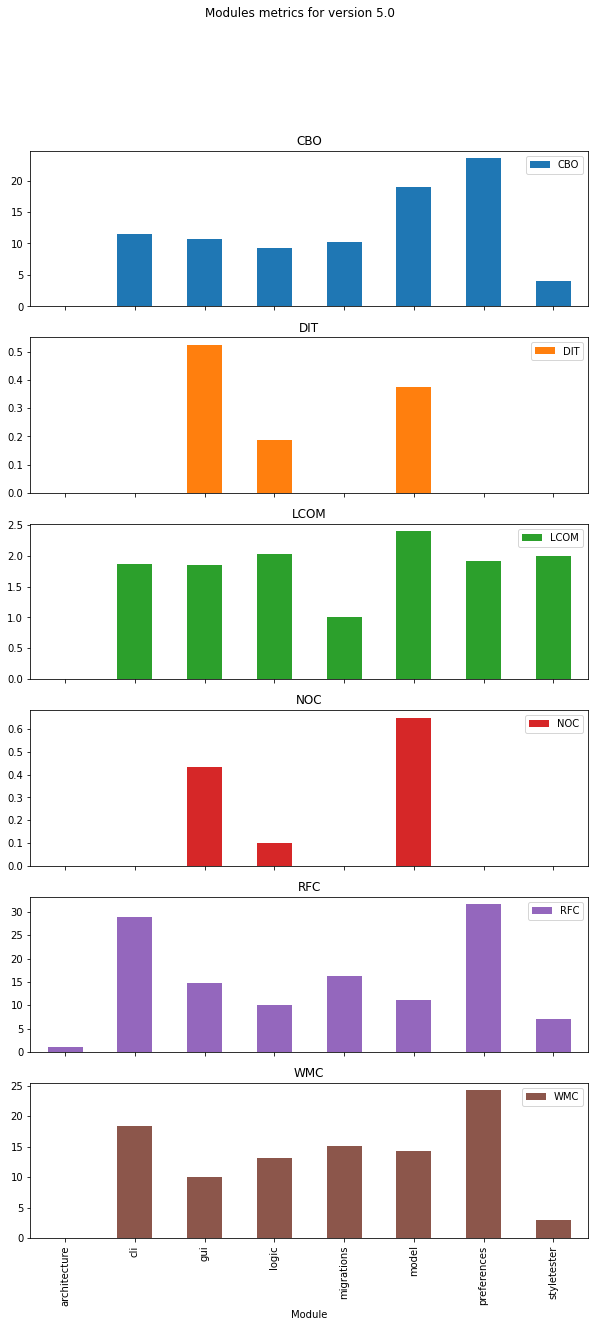

In [12]:
d = data[data["Version"]=="5-0"].loc["mean"]
figarray = d.plot.bar(x="Module",
                      subplots=True, 
                      figsize=(10,20), 
                      title="Modules metrics for version 5.0")

